## Importación de Librerias Revision independediente de cada dataframe por separado

Importación de librerías, de datos y conversion a dataframes para interaccion en Python:

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [46]:
data = pd.read_excel(
    "C:/Users/gicr9/OneDrive/Desktop/UNIR/Visualizacion Avanzada y automatizacion del analisis de datos/Actividades/Actividad 1/Datos/AdventureWorks.xlsx",
    sheet_name = [0,1,2,3,4,5,6])

sales_data = data[0]
customer_data = data[1]
product_data = data[2]
reseller_data = data[3]
sales_order_data = data[4]
sales_territory_data = data[5]
date_data = data[6]

pd.set_option('display.max_columns', None)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SalesOrderLineKey        121253 non-null  int64  
 1   ResellerKey              121253 non-null  int64  
 2   CustomerKey              121253 non-null  int64  
 3   ProductKey               121253 non-null  int64  
 4   OrderDateKey             121253 non-null  int64  
 5   DueDateKey               121253 non-null  int64  
 6   ShipDateKey              119140 non-null  float64
 7   SalesTerritoryKey        121253 non-null  int64  
 8   Order Quantity           121253 non-null  int64  
 9   Unit Price               121253 non-null  float64
 10  Extended Amount          121253 non-null  float64
 11  Unit Price Discount Pct  121253 non-null  int64  
 12  Product Standard Cost    121253 non-null  float64
 13  Total Product Cost       121253 non-null  float64
 14  Sale

In [48]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18485 non-null  int64 
 1   Customer ID     18485 non-null  object
 2   Customer        18485 non-null  object
 3   City            18485 non-null  object
 4   State-Province  18485 non-null  object
 5   Country-Region  18485 non-null  object
 6   Postal Code     18485 non-null  object
dtypes: int64(1), object(6)
memory usage: 1011.0+ KB


In [49]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductKey     397 non-null    int64  
 1   SKU            397 non-null    object 
 2   Product        397 non-null    object 
 3   Standard Cost  397 non-null    float64
 4   Color          341 non-null    object 
 5   List Price     397 non-null    float64
 6   Model          397 non-null    object 
 7   Subcategory    397 non-null    object 
 8   Category       397 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 28.0+ KB


In [50]:
reseller_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ResellerKey     702 non-null    int64 
 1   Reseller ID     702 non-null    object
 2   Business Type   702 non-null    object
 3   Reseller        702 non-null    object
 4   City            702 non-null    object
 5   State-Province  702 non-null    object
 6   Country-Region  702 non-null    object
 7   Postal Code     702 non-null    object
dtypes: int64(1), object(7)
memory usage: 44.0+ KB


In [51]:
sales_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Channel            121253 non-null  object
 1   SalesOrderLineKey  121253 non-null  int64 
 2   Sales Order        121253 non-null  object
 3   Sales Order Line   121253 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [52]:
sales_territory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  11 non-null     int64 
 1   Region             11 non-null     object
 2   Country            11 non-null     object
 3   Group              11 non-null     object
dtypes: int64(1), object(3)
memory usage: 484.0+ bytes


In [ ]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateKey         1461 non-null   int64         
 1   Date            1461 non-null   datetime64[ns]
 2   Fiscal Year     1461 non-null   object        
 3   Fiscal Quarter  1461 non-null   object        
 4   Month           1461 non-null   object        
 5   Full Date       1461 non-null   object        
 6   MonthKey        1461 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 80.0+ KB


In [54]:
date_data.rename(columns = {'DateKey':'OrderDateKey'},inplace = True)

##  Union de Dataframes y Examinacion de calidad de los Datos

En vista de que el dataframe de ventas posee claves ajenas para conectar con cada una de los demás dataframes procedemos a combinarlos para ver en conjunto todos los datos de los que disponemos y examinarlos con más detalle, ya que anteriormente solo obtuvimos una vista inicial.

In [13]:
sales_comb = sales_data.merge(customer_data, how = 'left', on = 'CustomerKey')
sales_comb = sales_comb.merge(product_data, how = 'left', on = 'ProductKey')
sales_comb = sales_comb.merge(reseller_data, how = 'left', on = 'ResellerKey')
sales_comb = sales_comb.merge(sales_order_data, how = 'left', on = 'SalesOrderLineKey')
sales_comb = sales_comb.merge(sales_territory_data, how = 'left', on = 'SalesTerritoryKey')
sales_comb = sales_comb.merge(date_data, how = 'left', on = 'OrderDateKey')
sales_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SalesOrderLineKey        121253 non-null  int64         
 1   ResellerKey              121253 non-null  int64         
 2   CustomerKey              121253 non-null  int64         
 3   ProductKey               121253 non-null  int64         
 4   OrderDateKey             121253 non-null  int64         
 5   DueDateKey               121253 non-null  int64         
 6   ShipDateKey              119140 non-null  float64       
 7   SalesTerritoryKey        121253 non-null  int64         
 8   Order Quantity           121253 non-null  int64         
 9   Unit Price               121253 non-null  float64       
 10  Extended Amount          121253 non-null  float64       
 11  Unit Price Discount Pct  121253 non-null  int64         
 12  Product Standard

La variable con un mayor numero de elementos nulos con respecto a las demás es "Color". Mientras con con "ShipDateKey" podemos inferir que las ordenes no han sido enviadas, en el caso de color, nos interesa ver un poco más en detalle los productos relacionados

In [14]:
sales_comb[['Product','Category']][sales_comb['Color'].isnull()].value_counts()

Product                  Category   
Water Bottle - 30 oz.    Accessories    4688
Patch Kit/8 Patches      Accessories    3354
Mountain Tire Tube       Accessories    3095
Road Tire Tube           Accessories    2376
Fender Set - Mountain    Accessories    2121
Mountain Bottle Cage     Accessories    2025
Road Bottle Cage         Accessories    1712
Touring Tire Tube        Accessories    1488
HL Mountain Tire         Accessories    1396
Bike Wash - Dissolver    Accessories    1327
ML Mountain Tire         Accessories    1161
LL Road Tire             Accessories    1044
Touring Tire             Accessories     935
ML Road Tire             Accessories     926
LL Mountain Tire         Accessories     862
HL Road Tire             Accessories     858
Hitch Rack - 4-Bike      Accessories     796
ML Mountain Handlebars   Components      507
LL Mountain Handlebars   Components      301
HL Road Handlebars       Components      270
Minipump                 Accessories     267
Cable Lock        

Tras unificar los datos utilizando el método Left join con ayuda de la función `merge()` podemos hacer las siguientes observaciones e inferencias con respecto a la calidad de los datos:

- La variable "ShipDateKey" y "Color" poseen un número menor de observaciones que el resto de variables en el set de datos con un numero de 119,140 y 87,109 respectivamente (El resto de las variables cuenta con 121,253 observaciones).
- Para "ShipDateKey" esta diferencia parece implicar que existen ordenes que no han sido enviadas aun, mientras que para "Color" al parecer los valores nulos corresponden a productos para los cuales esta característica no tiene mucha relevancia.
- Los demás datos están completos. sobre todo aquellos relevantes al aspecto financiero.

Limitaciones:
- Al no tener todas las fechas de entrega disponibles, no podemos obtener un cálculo de tiempos de entrega que comprenda todo el dataframe.
- El dataset solo parece proporcionar costo de producto por lo que los cálculos relacionados al margen que de ganancia estarán limitados en ese aspecto.

Ya unificados los dataframes y observada la calidad y limitaciones de los mismos, entonces procedemos a deshacernos de aquellas variables que entendemos no tienen relevancia para nuestros objetivos, como por ejemplo las columnas con claves ajenas que actualmente ocupan espacio y podría ralentizar el procesamiento de algunos cálculos o visualizaciones al exportar a nuestra herramienta de BI y completaremos los datos nulos de la columna color basados en las previas observaciones.

In [15]:
sales_comb['Color'] = sales_comb['Color'].fillna('N/A')

In [16]:
#sales_comb_final = sales_comb.iloc[:,8:-1]
sales_comb_customers = sales_comb.drop(columns = sales_comb.iloc[0:1,29:36]).iloc[:,8:-1]
sales_comb_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Order Quantity           121253 non-null  int64         
 1   Unit Price               121253 non-null  float64       
 2   Extended Amount          121253 non-null  float64       
 3   Unit Price Discount Pct  121253 non-null  int64         
 4   Product Standard Cost    121253 non-null  float64       
 5   Total Product Cost       121253 non-null  float64       
 6   Sales Amount             121253 non-null  float64       
 7   Customer ID              121253 non-null  object        
 8   Customer                 121253 non-null  object        
 9   City_x                   121253 non-null  object        
 10  State-Province_x         121253 non-null  object        
 11  Country-Region_x         121253 non-null  object        
 12  Postal Code_x   

## Estadisticas Descriptivas

Procedemos a tomar las estadísticas descriptivas correspondientes para describir el dataframe a utilizar tomando en cuenta que para trabajar con los clientes pensamos segmentar utilizando RFM (recency/recencia, frecuency/frecuencia y monetary value/valor monetario) en el cual toman una mayor importancia las variables "Sales Order" (para identificar ordenes únicas), "Sales Amount" y "Date".

In [17]:
sales_comb_customers.describe()

,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount,Standard Cost,List Price,Date
count,121253.000000,121253.000000,121253.000000,121253.0,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000,121253
mean,2.266138,465.180515,909.971564,0.0,362.643598,802.107230,905.621091,362.643598,619.342984,2019-08-07 20:29:19.191112960
min,1.000000,1.328200,1.374000,0.0,0.856500,0.856500,1.374000,0.856500,2.290000,2017-07-01 00:00:00
25%,1.000000,21.490000,24.990000,0.0,9.159300,10.842300,24.990000,9.159300,24.490000,2019-04-12 00:00:00
50%,1.000000,49.990000,134.982000,0.0,38.492300,98.983600,134.982000,38.492300,63.500000,2019-10-11 00:00:00
75%,3.000000,602.346000,1120.490000,0.0,486.706600,999.259500,1120.490000,486.706600,782.990000,2020-02-20 00:00:00
max,44.000000,3578.270000,30992.910000,0.0,2171.294200,38530.385400,27893.619000,2171.294200,3578.270000,2020-06-15 00:00:00
std,2.491806,752.041893,1705.565586,0.0,541.688873,1660.416044,1693.746343,541.688873,913.694200,NaN


**Observaciones:**
- "Sales Amount" tiene una media muy superior a la mediana lo que nos sugiere que los datos para esta variable tienen una distribución asimétrica positiva (sesgada hacia la derecha).
- La desviación estándar de 1693.75 en "Sales Amount" nos indica una dispersión elevada al presentar una distancia pronunciada de los datos con relacion a su media.

Al ver estas estadísticas procedemos a utilizar gráficos que nos ayuden a confirmar nuestras inferencias. Para esto utilizaremos un histograma y un diagrama de cajas, los cuales resultan ser muy útiles para visualizar la distribución de los datos.

### Diagrama de Cajas

primero visualizamos sacando valores atípicos de del grafico para ver la distribución real con más claridad.

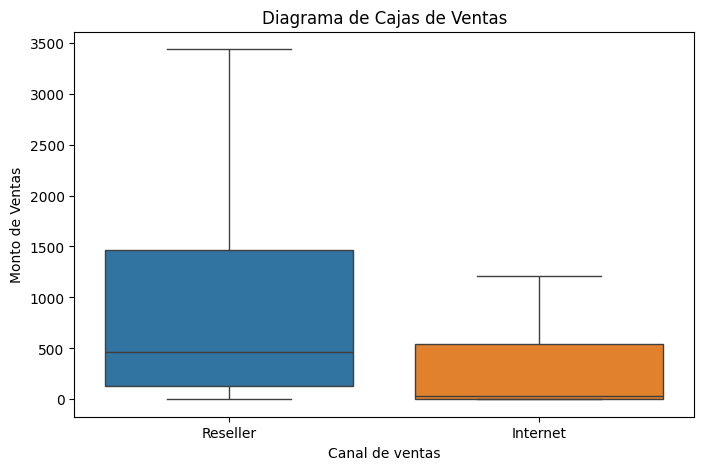

In [18]:
plt.figure(figsize = (8,5))
sns.boxplot(data = sales_comb_customers, x = 'Channel', y = 'Sales Amount', hue = 'Channel', showfliers = False)
plt.title('Diagrama de Cajas de Ventas')
plt.ylabel('Monto de Ventas')
plt.xlabel('Canal de ventas')
plt.show()

Ahora con los valores atípicos incluidos.

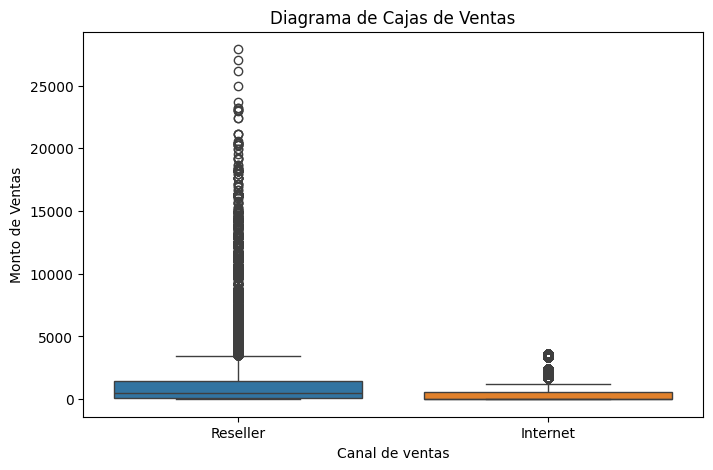

In [19]:
plt.figure(figsize = (8,5))
sns.boxplot(data = sales_comb_customers, x = 'Channel', y = 'Sales Amount', hue = 'Channel' )
plt.title('Diagrama de Cajas de Ventas')
plt.ylabel('Monto de Ventas')
plt.xlabel('Canal de ventas')
plt.show()

### Histograma

Al notar que los valores atípicos para los canales de venta aparenta exceder los 5,000 USD, procederemos a limitar el rango de nuestro histograma a este valor con el objetivo de obtener una visual más clara.

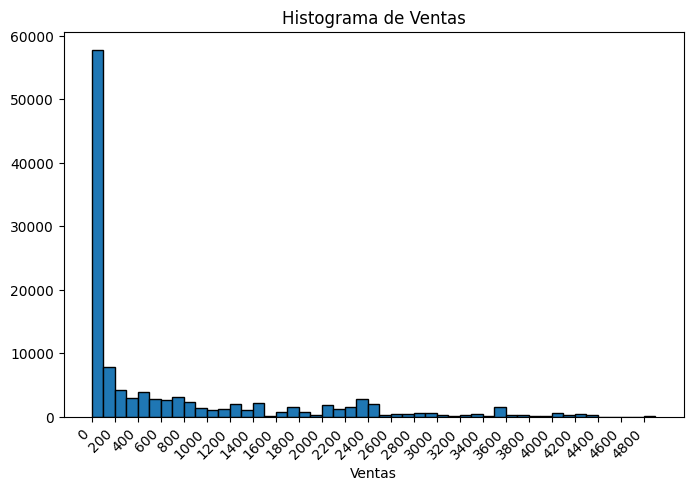

In [20]:
plt.figure(figsize = (8,5))
plt.hist(data = sales_comb_customers, x = 'Sales Amount', bins = range(0,5000,100), edgecolor = 'black')
plt.title('Histograma de Ventas')
plt.xlabel('Ventas')
plt.xticks(range(0,5000,200),ha = 'right', rotation = 45)
plt.show()

### Conclusion sobre los datos Con respecto a los Graficos

tras observar las visualizaciones anteriores, podemos afirmar nuestras anteriores inferencias sobre la distribución de los datos y su dispersión. En adición, el diagrama de cajas hace evidente que la distribución asimétrica positiva se mantiene incluso tras eliminar valores atípicos.

## Modificacion y Creacion de Variable

Ya revisados los datos procedemos con la creación de una nueva variable y renombraremos la columna de fechas para reflejar que se corresponden con la fecha de orden de compra. De manera inmediata visualizaremos la información del dataframe para confirmar que los cambios han surtido efecto.

In [21]:
sales_comb_customers.rename(columns = {'Date':'Order Date'}, inplace = True)

sales_comb_customers['Profit'] = sales_comb_customers['Sales Amount'] - sales_comb_customers['Total Product Cost']
sales_comb_customers['Profit Margin'] = sales_comb_customers['Profit']/sales_comb_customers['Sales Amount']
sales_comb_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Order Quantity           121253 non-null  int64         
 1   Unit Price               121253 non-null  float64       
 2   Extended Amount          121253 non-null  float64       
 3   Unit Price Discount Pct  121253 non-null  int64         
 4   Product Standard Cost    121253 non-null  float64       
 5   Total Product Cost       121253 non-null  float64       
 6   Sales Amount             121253 non-null  float64       
 7   Customer ID              121253 non-null  object        
 8   Customer                 121253 non-null  object        
 9   City_x                   121253 non-null  object        
 10  State-Province_x         121253 non-null  object        
 11  Country-Region_x         121253 non-null  object        
 12  Postal Code_x   

In [22]:
sales_comb_customers.head()

,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount,Customer ID,Customer,City_x,State-Province_x,Country-Region_x,Postal Code_x,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category,Channel,Sales Order,Sales Order Line,Region,Country,Group,Order Date,Fiscal Year,Fiscal Quarter,Month,Full Date,Profit,Profit Margin
0,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes,Reseller,SO43659,SO43659 - 1,Southeast,United States,North America,2017-07-02,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",126.8996,0.062667
1,3,2024.994,6074.982,0,1898.0944,5694.2832,6074.982,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],BK-M82B-44,"Mountain-100 Black, 44",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes,Reseller,SO43659,SO43659 - 2,Southeast,United States,North America,2017-07-02,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",380.6988,0.062667
2,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],BK-M82B-48,"Mountain-100 Black, 48",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes,Reseller,SO43659,SO43659 - 3,Southeast,United States,North America,2017-07-02,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",126.8996,0.062667
3,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],BK-M82S-38,"Mountain-100 Silver, 38",1912.1544,Silver,3399.99,Mountain-100,Mountain Bikes,Bikes,Reseller,SO43659,SO43659 - 4,Southeast,United States,North America,2017-07-02,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",127.8396,0.062667
4,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],BK-M82S-42,"Mountain-100 Silver, 42",1912.1544,Silver,3399.99,Mountain-100,Mountain Bikes,Bikes,Reseller,SO43659,SO43659 - 5,Southeast,United States,North America,2017-07-02,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",127.8396,0.062667


## Segmentación

Crearemos un Dataframe centrado en la segmentación de clientes utilizando el marco de trabajo RFM (Recencia, frecuencia y valor monetario).

In [ ]:
snapshot_date =  sales_comb_customers['Order Date'].max() + dt.timedelta(days = 1)

Customer_mask = sales_comb_customers['Channel'] == 'Internet'

rfm = sales_comb_customers[Customer_mask].groupby(['Customer ID','Customer'], as_index= False).agg({'Order Date': lambda x: (snapshot_date - x.max()).days,
                                                                   'Sales Order':'nunique', 'Sales Amount':'sum'}).rename(columns = {'Order Date':'Recency',
                                                                                                                                      'Sales Order': 'Frequency',
                                                                                                                                      'Sales Amount': 'Monetary Value'
                                                                                                                                     })

rfm.head()

,Customer ID,Customer,Recency,Frequency,Monetary Value
0,AW00011000,Jon Yang,256,3,8248.99
1,AW00011001,Eugene Huang,35,3,6383.88
2,AW00011002,Ruben Torres,325,3,8114.04
3,AW00011003,Christy Zhu,249,3,8139.29
4,AW00011004,Elizabeth Johnson,258,3,8196.01


### Prueba de Inercia y Silueta

Utilizando métricas dentro de la libreria `sklearn` procedemos a confirmar la selección ideal de la cantidad de clusters que necesitaremos y si se alinean con el marco RFM por el que optamos. Para ello necesitamos estandarizar los datos de recién creado dataframe rfm y definir funciones. La primera métrica por calcular será la de inercia.

In [ ]:
rfm_scaled = StandardScaler().fit_transform(rfm.iloc[:,2:])

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init = 10)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [ ]:
inertia = kmeans_inertia(num_clusters, rfm_scaled)
inertia

[37782.45059151246,
 28151.903144645315,
 19076.850342141173,
 13390.859308063182,
 11244.581537166076,
 9395.945586720052,
 8231.12176834895,
 7345.660813153022,
 6557.033770775003]

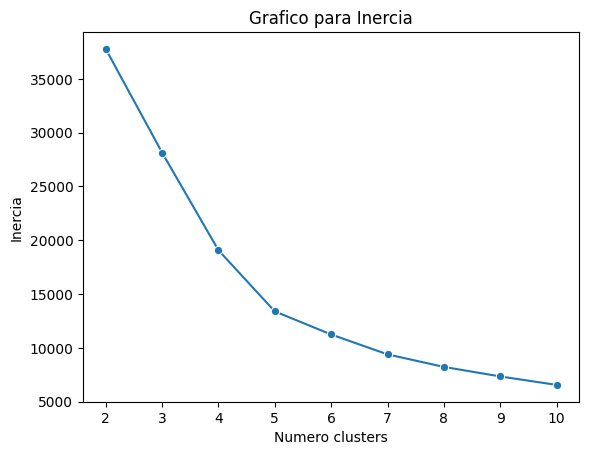

In [ ]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plt.title('Grafico para Inercia')
plt.xlabel('Numero clusters')
plt.ylabel('Inercia')
plt.show()

**Interpretación**

Acá podemos visualizar como el "codo" en este grafico de línea nos muestra que la pendiente inicia a cambiar a partir del cuarto cluster, pero dicho cambio se hace aún más pronunciado luego del quinto. Con esto podríamos decir que ambas opciones en cuanto a cantidad de clusters estaría bien, sin embargo; Realizaremos otra prueba con el coeficiente de silueta definiendo otra funcion para confirmar.

In [ ]:
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init = 10)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, rfm_scaled)
sil_score

[0.4952389414729153,
 0.4735051767670395,
 0.5120628727424589,
 0.42328143194209644,
 0.4183038987410263,
 0.4246190071689267,
 0.43170154807749855,
 0.434606570599305,
 0.4352608581124152]

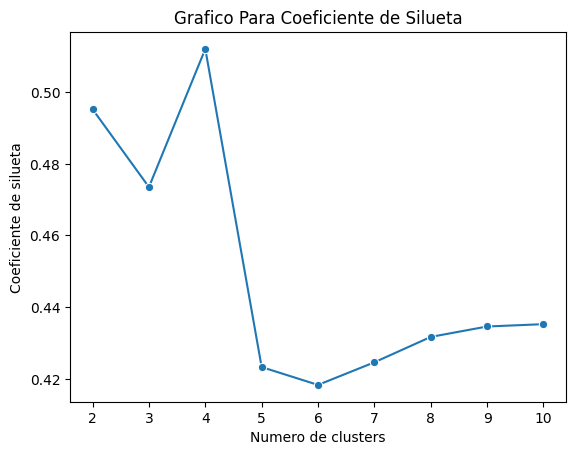

In [ ]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plt.title('Grafico Para Coeficiente de Silueta')
plt.xlabel('Numero de clusters')
plt.ylabel('Coeficiente de silueta')
plt.show()

**Interpretación**

El bajar pronunciadamente a partir del cuarto cluster donde este alcanza un valor máximo de 0.51 nos indica que ciertamente hay una distinción real entre clusters ya que superar el 0.5 es un excelente indicador de que los segmentos "existen" realmente y no son ruido. 

Si bien es cierto el que el modelo de 4 clústeres encaja perfectamente con la teoría clásica de segmentación de clientes es ciertamente importante fundamentar la elección también a través de criterios técnicos.

### Aplicacion del  Modelo de Custering

Aplicamos un modelo de Kmeans para que en base a las variables rfm que creamos, cada cliente sea asignado a uno de 4 segmentos. Para evitar errores y que el modelo atribuya peso a variables con escala superior, procedimos con la estandarizacion de de las variables utilizando `StandardScaler()` y `fit_transform()`, mientras que mantenemos un resultado replicable al proporcionar una semilla o "random state" de 42.

El resultado de la asignacion de cluster es entonces agregado al dataframe "rfm" y esto a su ves nos permitirar adjuntar la variable "Cluster" a nuestro dataframe final anterior "sales_comb_customers" usando la funcion `merge()`

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Customer ID,Customer,Recency,Frequency,Monetary Value,Cluster
0,AW00011000,Jon Yang,256,3,8248.99,3
1,AW00011001,Eugene Huang,35,3,6383.88,3
2,AW00011002,Ruben Torres,325,3,8114.04,3
3,AW00011003,Christy Zhu,249,3,8139.29,3
4,AW00011004,Elizabeth Johnson,258,3,8196.01,3


Agrupamos los datos por cluster utilizando el promedio de las variables RFM para poder preliminarmente observarlos en formato de tabla:

In [ ]:
summarized_rfm= rfm.groupby('Cluster',as_index = False).agg({'Recency':'mean', 'Frequency':'mean' , 
                                            'Monetary Value':'mean', 
                                            'Customer ID':'count'}).rename(columns = {'Recency':'Avg Recency (Days)', 
                                                                                        'Frequency':'Avg Frequency (Orders)',
                                                                                        'Monetary Value':'Avg Monetary Value ($)',
                                                                                         'Customer ID':'Num Customers'}).round()
summarized_rfm

,Cluster,Avg Recency (Days),Avg Frequency (Orders),Avg Monetary Value ($),Num Customers
0,0,841.0,1.0,2937.0,405
1,1,162.0,1.0,504.0,13648
2,2,11.0,21.0,986.0,35
3,3,158.0,2.0,4835.0,4396


Al observar los resultados de nuestra agrupación podemos definir estos clústeres como:

- 0: Clientes perdidos (841 días desde su último pedido). 
- 1: Clientes estándar (nuestro mayor cluster con 13,648 clientes).
- 2: Clientes Muy Activos (solo 11 días desde su último pedido).
- 3: Clientes de Alto Valor (Este cluster presenta el mayor nivel de gasto/valor de compra).

Ahora procedemos con completar nuestro dataframe con los cluster creados y a exportarlos para su posterior uso.  Exportaremos "rfm" y "sales_comb_clustered".

In [ ]:
segments = {0:'Clientes perdidos', 1:'Clientes estándar', 2:'Clientes Muy Activos', 3:'Clientes de Alto Valor'}

summarized_rfm['Segments'] =  summarized_rfm['Cluster'].map(segments)
summarized_rfm

,Cluster,Avg Recency (Days),Avg Frequency (Orders),Avg Monetary Value ($),Num Customers,Segments
0,0,841.0,1.0,2937.0,405,Clientes perdidos
1,1,162.0,1.0,504.0,13648,Clientes estándar
2,2,11.0,21.0,986.0,35,Clientes Muy Activos
3,3,158.0,2.0,4835.0,4396,Clientes de Alto Valor


In [ ]:
sales_comb_clustered = sales_comb_customers.merge(rfm[['Customer ID', 'Cluster']], how = 'left', on = 'Customer ID')
sales_comb_clustered.to_csv('C:/Users/gicr9/Downloads/sales_comb_clustered.csv', index = False)
rfm.to_csv('C:/Users/gicr9/Downloads/rfm.csv', index = False)

### Visualización de segmentos

Procedemos a visualizar los diferentes segmentos utilizando un grafico de dispersión.

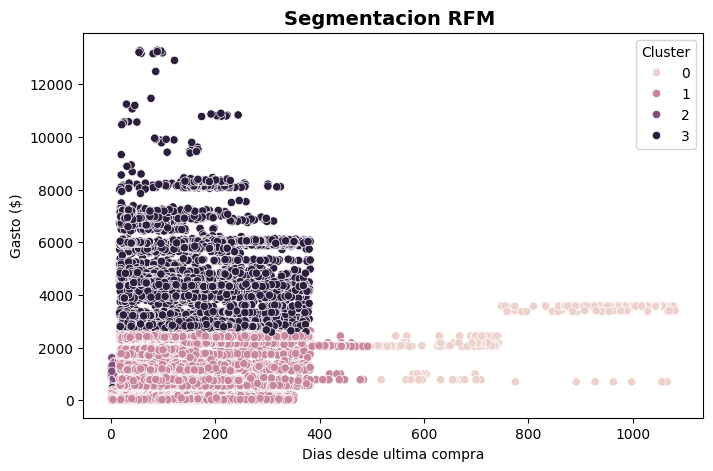

In [ ]:
plt.figure(figsize = (8,5))

sns.scatterplot(data = rfm, x = 'Recency', y = 'Monetary Value', hue = 'Cluster')
plt.xlabel('Dias desde ultima compra')
plt.ylabel('Gasto ($)')
plt.title('Segmentacion RFM ', size = 14, fontweight='bold')

plt.show()

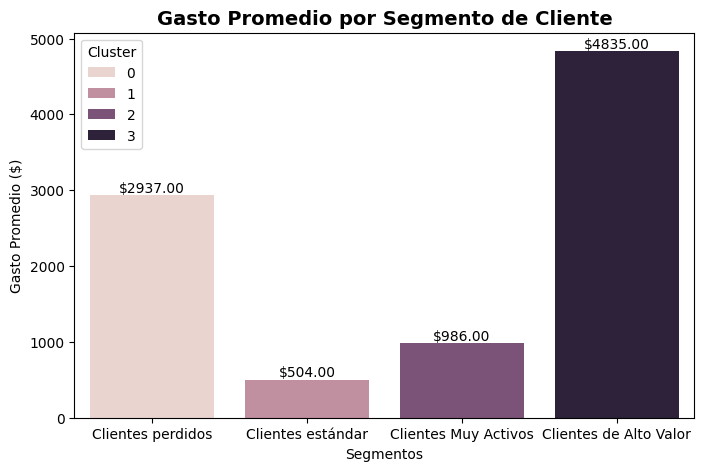

In [ ]:
plt.figure(figsize = (8,5))

m_bar = sns.barplot(data = summarized_rfm, x = 'Segments', y = 'Avg Monetary Value ($)', hue = 'Cluster')
plt.xlabel('Segmentos')
plt.ylabel('Gasto Promedio ($)')
plt.title('Gasto Promedio por Segmento de Cliente', size = 14, fontweight='bold')
for container in m_bar.containers:
    m_bar.bar_label(container, fmt='$%.2f')

plt.show()